In [1]:
%run "C:/Users/ssiva/OneDrive/Documents/Machine_Learning/Machine_Learning/Machine_Learning_Algorithms/Machine_Learning_Algorithms.ipynb"

Available functions:


create_random_df(model,nrows,ncols,nclasses,target_multiplier = 1),

find_cols_to_ignore(df,thresh_cat = 0.02,cols_to_ignore = None),

impute_cols(df,k=None,thresh_null_cat = 0.02,cols_to_ignore = None),

num_unique_values_in_cols(df,cols = None),

remove_outliers(df_in,outlier_cols,thresh_cat = 0.02,remove = True),

convert_cat(df, cat_cols,output_col=None,reset_index = False),

normalize(df,cols_to_ignore = None,target_col = None),

split_df(df,test_size = 0.3,df_to_return = 'df_train'),

shuffled_split_dfs(df,test_size = 0.3),

check_accuracy(df = None,pred_df = None, test_df = None, algo = 'lin',target_class = None),

stoch_grad_desc(dataset,output_col,cols_to_ignore = None,alpha = 0.1,epoch = 10,algo = 'lin',initial_coeffs = 1),

make_predictions(dataset, coeff_list, output_col,cols_to_ignore = None,algo = 'lin'),

knn(df_train,new_pts_list,dep_col,k = 7,only_pred_df = True),

kmeans(df,k=3,epoch = 1),

cart(df)


Additional Info:

seaborn_palettes is a list

In [2]:
heart_df = pd.read_csv(r'heart_data.csv')

In [28]:
attribute_info = '''Attribute Information: 
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
target: 0= less chance of heart attack 1= more chance of heart attack'''

In [29]:
print(attribute_info)

Attribute Information: 
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
target: 0= less chance of heart attack 1= more chance of heart attack


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Null Value Treatment

In [6]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no null values in the dataframe

### EDA

In [74]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
num_unique_values_in_cols(heart_df)

{'age': 41,
 'ca': 5,
 'chol': 152,
 'cp': 4,
 'exang': 2,
 'fbs': 2,
 'oldpeak': 40,
 'restecg': 3,
 'sex': 2,
 'slope': 3,
 'target': 2,
 'thal': 4,
 'thalach': 91,
 'trestbps': 49}

In [10]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


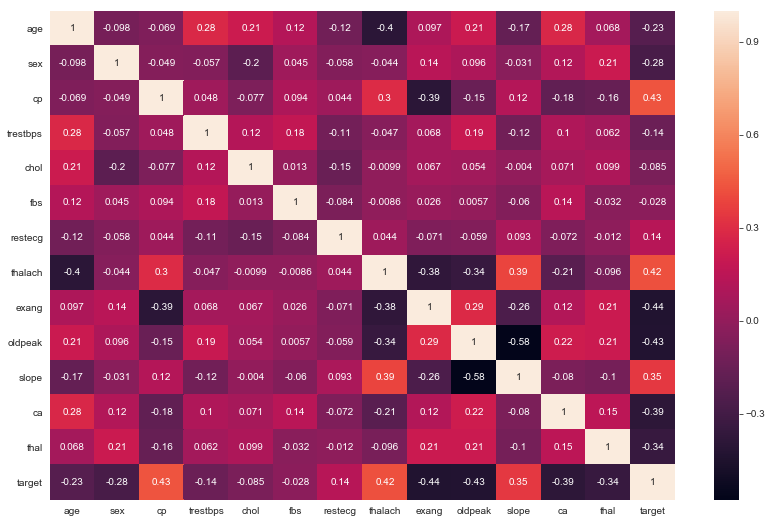

In [31]:
sns.heatmap(heart_df.corr(),annot = True)

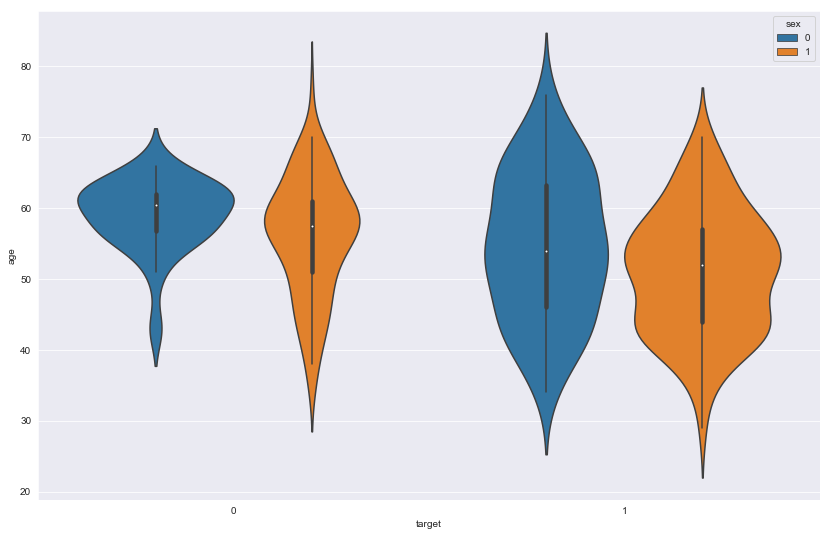

In [34]:
sns.violinplot(data = heart_df,x = 'target',y='age',hue = 'sex')

#### Patients with heart attacks tend be younger.  Patients who are male tend to be younger than patients who are female regardless of if the patient had a heart attack or not.

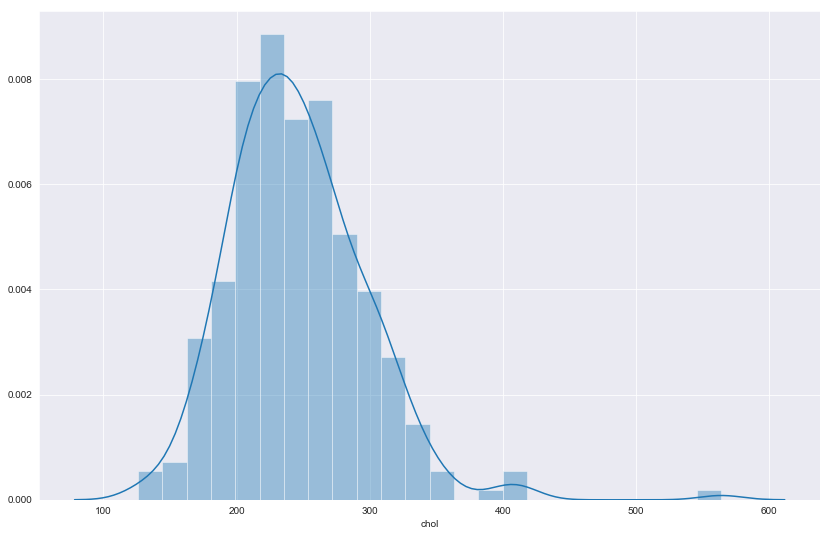

In [77]:
sns.distplot(heart_df['chol'])

#### There are some outliers in the data which I will treat for.

In [169]:
heart_no_outliers = remove_outliers(heart_df)

In [170]:
heart_no_outliers.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,53.992958,0.700704,0.989437,129.911972,242.077465,0.140845,0.524648,150.042254,0.316901,0.948592,1.429577,0.707746,2.295775,0.559859
std,9.161678,0.458758,1.031258,15.368133,44.753834,0.348476,0.514206,22.692716,0.466090,1.026141,0.599150,1.003075,0.609567,0.497280
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [171]:
heart_cat_cols = find_cols_to_ignore(heart_no_outliers,cols_to_ignore='target')

In [172]:
heart_cat_cols

['sex', 'ca', 'slope', 'thal', 'fbs', 'exang', 'restecg', 'cp', 'target']

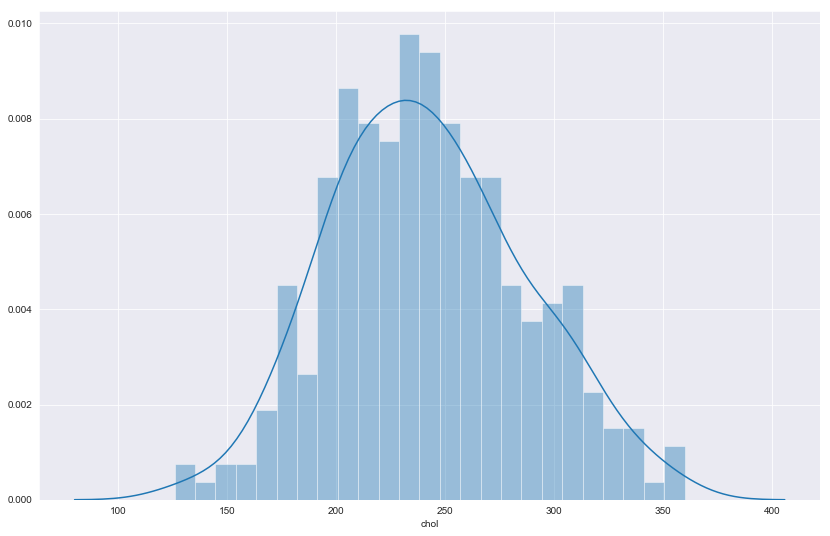

In [225]:
sns.distplot(heart_no_outliers['chol'],bins = 25)

In [ ]:
#### Cholesterol levels seem to be normally distributed around 240 with a slight positive skew.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D61076D668>,
      dtype=object)

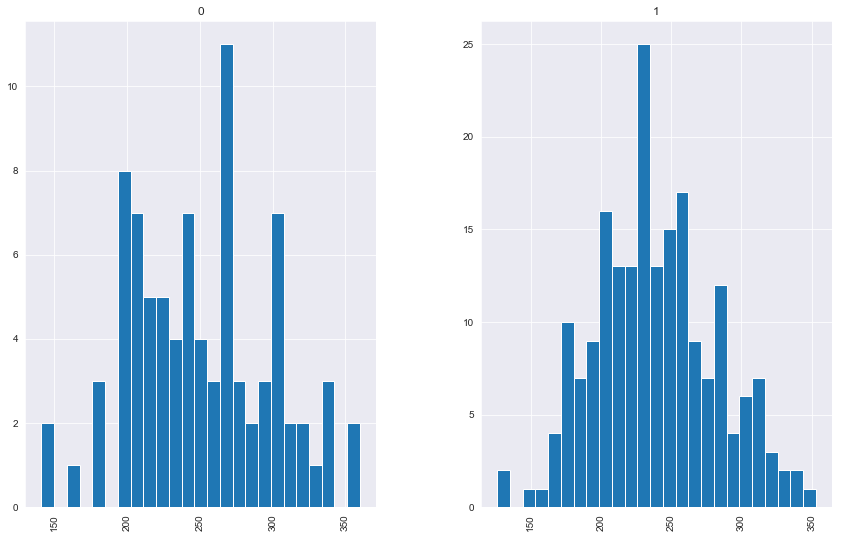

In [226]:
heart_no_outliers.hist('chol',bins = 25,by = 'sex')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6108639B0>,
      dtype=object)

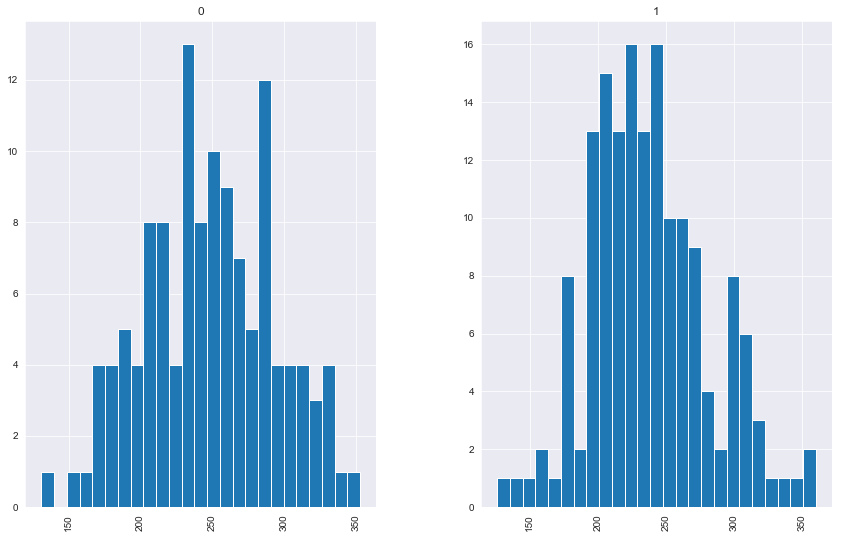

In [227]:
heart_no_outliers.hist('chol',bins = 25,by = 'target')

In [212]:
heart_grouped = heart_no_outliers.groupby('target').mean()

In [213]:
heart_grouped

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.328000,0.864000,0.504000,131.88000,247.60800,0.152000,0.424000,139.200000,0.544000,1.45200,1.208000,1.136000,2.536000
1,52.157233,0.572327,1.371069,128.36478,237.72956,0.132075,0.603774,158.566038,0.138365,0.55283,1.603774,0.371069,2.106918


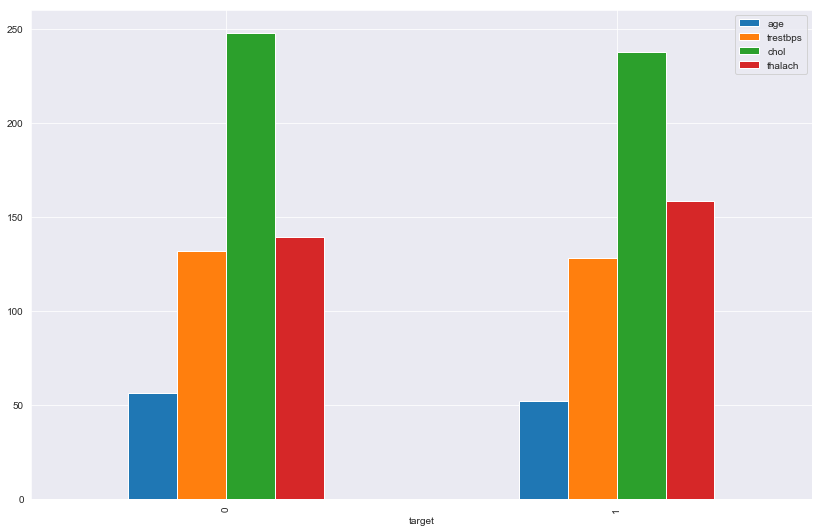

In [223]:
heart_grouped[['age','trestbps','chol','thalach']].plot(kind = 'bar')

#### People who have had a heart attack tend to:
* be very slightly younger
* have very slightly lower trest bps
* have slightly lower cholesterol
* have higher thalach score meaning higher chance of having a defect

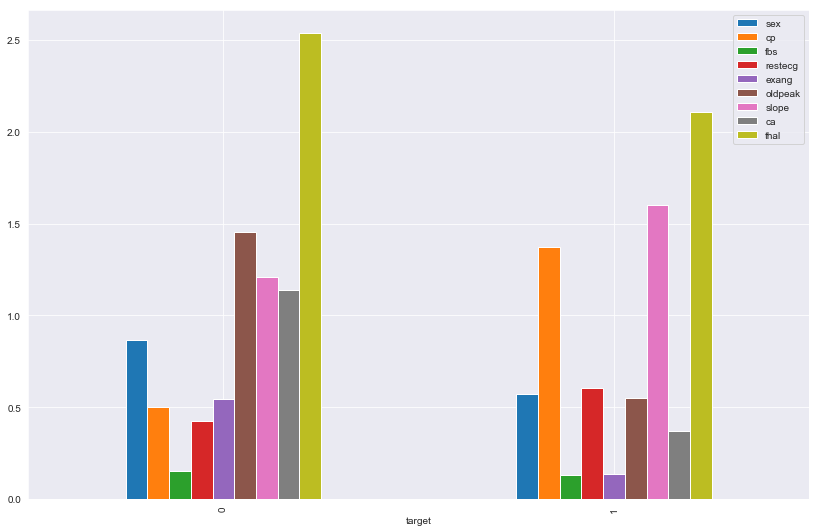

In [224]:
heart_grouped[heart_grouped.columns.drop(['age','trestbps','chol','thalach'])].plot(kind = 'bar')

#### People who had heart attacks tend to be more likely to be male but tend to be more likely to be female than those who did not have a heart attack. 
#### Patients who had a heart attack had:
* higher cp (almost 3x as much)
* slightlyy lower fbs
* higher resting ecg
* around 20% the exang
* a little over a third the old peak
* significantly higher slope
* one third the ca
* significantly less thal 
#### than patients who have not had a heart attack.

### Linear Regression Model

In [198]:
heart_norm = normalize(heart_no_outliers,heart_cat_cols,target_col = 'target')

In [175]:
heart_cnvrtd = convert_cat(heart_norm,heart_cat_cols,'target')

In [176]:
heart_cnvrtd.describe()

,age,trestbps,chol,thalach,oldpeak,sex__1,ca__1,ca__2,ca__3,ca__4,...,thal__2,thal__3,fbs__1,exang__1,restecg__1,restecg__2,cp__1,cp__2,cp__3,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.520687,0.472526,0.496058,0.544230,0.237148,0.700704,0.221831,0.123239,0.056338,0.017606,...,0.563380,0.369718,0.140845,0.316901,0.510563,0.007042,0.172535,0.292254,0.077465,0.559859
std,0.190868,0.202212,0.191256,0.199059,0.256535,0.458758,0.416211,0.329292,0.230980,0.131745,...,0.496842,0.483580,0.348476,0.466090,0.500771,0.083770,0.378512,0.455601,0.267799,0.497280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.369792,0.342105,0.357906,0.401316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541667,0.473684,0.482906,0.570175,0.150000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.645833,0.605263,0.616453,0.701754,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
heart_train,heart_test = shuffled_split_dfs(heart_cnvrtd)

In [190]:
heart_coeffs = stoch_grad_desc(heart_train,'target',algo= 'log',alpha = 0.1,epoch = 250)

Program took 0.0 hr(s), 0.0 min(s), 25.454899311065674 sec(s) to run


In [191]:
heart_pred = make_predictions(heart_test,heart_coeffs,'target',algo = 'log')

In [192]:
heart_pred.head()

,age,trestbps,chol,thalach,oldpeak,sex__1,ca__1,ca__2,ca__3,ca__4,...,exang__1,restecg__1,restecg__2,cp__1,cp__2,cp__3,target,Prediction,Crisp,Correct?
198,0.583333,0.210526,0.893162,0.482456,0.75,1,1,0,0,0,...,1,1,0,0,0,0,0,0.001815,0,True
199,0.833333,0.605263,0.547009,0.508772,0.50,1,0,0,1,0,...,0,0,0,0,1,0,0,0.047368,0,True
200,0.250000,0.473684,0.376068,0.701754,0.50,1,0,0,0,0,...,0,0,0,0,1,0,1,0.764010,1,True
201,0.479167,0.447368,0.551282,0.640351,0.00,1,1,0,0,0,...,1,1,0,0,0,0,0,0.122807,0,True
202,0.604167,0.500000,0.418803,0.745614,0.80,1,0,1,0,0,...,0,0,0,0,1,0,0,0.049814,0,True


In [193]:
check_accuracy(heart_pred,algo ='log')

[[27 11]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79        38
           1       0.80      0.94      0.87        48

    accuracy                           0.84        86
   macro avg       0.85      0.82      0.83        86
weighted avg       0.85      0.84      0.83        86



0.8372093023255823

#### My model had a 94 % chance of correctly classifying all patients who are likely to have a heart attack and an 84 % chance of correctly classifying any patient.